Importing all the necessary packages

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from datetime import datetime

Place for important all data sets from which visualizations are to be made. Change the file path to accommodate the local computer

In [4]:
atl = pd.read_csv('ATL_1941_new_preprocessing.csv')
atl70 = pd.read_excel('/Users/clairefenton/Desktop/Emory/ATL_1970_Predictions_new_preprocessing.xlsx')
atl40 = pd.read_excel('/Users/clairefenton/Desktop/Emory/ATL_1940_new_preprocessing.xlsx')
atl4060 = pd.read_excel('Atlanta_Daily_Word_Dataset_1940_1960_new_preprocessing.xlsx')
nyt = pd.read_excel('/Users/clairefenton/Downloads/NYT_predictions.xlsx')

Only run the below block if working with New York Times data: formats the date to YYYY-MM-DD

In [8]:
nyt['date'] = [str(x).replace('-', '')[:8] for x in nyt['date']]

Only run the below block if working with text that has not been pre-processed. Be sure to remove all NaN values from the text column using `df = df.dropna(subset='text_col)` and convert all entries to strings using `df['text_col] = df[text_col].astype(str)` if needed.

In [ ]:
def text_preprocessing(text):
    text = text.lower()

    text = re.sub(r'[_"\-;%()|^+~&=*%.,!?:#$@\[\]/]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'xa0', '', text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r'[\']', '', text)

    text = nltk.WordPunctTokenizer().tokenize(text)
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token) > 1]

    text = ' '.join(map(str, text))

    words = text.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]

    text = ' '.join(filtered_words)
    
    return text  

atl4060 = atl4060.dropna(subset='original_text')
atl4060['original_text'] = atl4060['original_text'].astype(str)

new_text = []
for i in range(len(atl4060)):
    text = atl4060['original_text'].iloc[i]
    text = text_preprocessing(text)
    new_text.append(text)

atl4060['text'] = new_text

Create an n-gram using the following parameters:
- df: the data set
- words: the list of words you'd like to view over time
- text_col: the column from df containing the pre-processed text
- date_col: the column from df containing dates in the YYYY-MM-DD format
- publication: a string value that will put the name of the paper in the title (i.e. 'Atlanta Daily World')
- year: a string value that will put the year(s) in the title (i.e. '1970')

In [5]:
def create_ngram(df, words, text_col, date_col, publication, year):
    for word in words:
        contains_word = []
        for i in range(len(df)):
            if word in df[text_col][i]:
                contains_word.append(1)
            else:
                contains_word.append(0)
        df['Contains ' + word] = contains_word
        if not isinstance(df[date_col].iloc[i], datetime):
            df[date_col] = [str(x) for x in df[date_col]]
            dates = [datetime(int(x[0:4]), int(x[4:6]), int(x[6:])) for x in df[date_col]]
            df['Date'] = dates
        else:
            df['Date'] = df[date_col]
        df['MonthYear'] = df['Date'].dt.to_period('M')
        df_grouped = df.groupby(df.MonthYear)['Contains ' + word].mean()

        all_values = list(df_grouped.values)
        all_words = list(df_grouped.index.to_timestamp())
        plt.plot(all_words, all_values, label = word)

    plt.xlabel("Date (month-year)")
    plt.ylabel("Proportion of articles")
    plt.legend()
    #plt.ylim(0, 1)
    plt.title("Appearances in " + publication + ' in ' + year)
    plt.show()

Full range from ATL 1940 to 1960

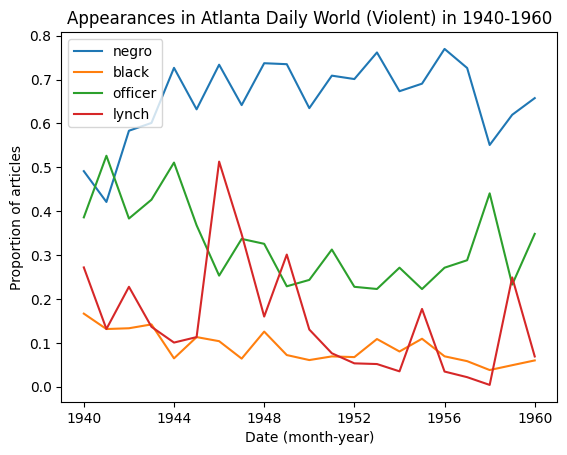

In [37]:
create_ngram(atl4060[atl4060['entry'] == 1].reset_index(), words=['negro', 'black', 'officer', 'lynch'], text_col='text', date_col='date', publication='Atlanta Daily World (Violent)', year = '1940-1960')